# Aula 8 - Testes T, Anova e Post-Hoc

## Teste T para Amostras Dependentes

### Teste de Hipótese
Qual o impacto da concussão na memória visual?
- H0: visual_memory_baseline - visual_memory_retest == 0
- HA: visual_memory_baseline - visual_memory_retest != 0

- assumir grau de significância alpha = 0.05
- amostras são dependentes: as entradas correspondem a antes e depois de uma mesma amostra

In [28]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin
import seaborn as sns
from scipy.stats import t, levene

In [3]:
# Importar base de dados impact
impact = pd.read_csv('../data/impact.csv')

In [4]:
# Informações gerais da base
impact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subject                      40 non-null     int64  
 1   condition                    40 non-null     object 
 2   verbal_memory_baseline       40 non-null     int64  
 3   visual_memory_baseline       40 non-null     int64  
 4   visual-motor_speed_baseline  40 non-null     float64
 5   reaction_time_baseline       40 non-null     float64
 6   impulse_control_baseline     40 non-null     int64  
 7   total_symptom_baseline       40 non-null     int64  
 8   verbal_memory_retest         40 non-null     int64  
 9   visual_memory_retest         40 non-null     int64  
 10  visual-motor_speed_retest    40 non-null     float64
 11  reaction_time_retest         40 non-null     float64
 12  impulse_control_retest       40 non-null     int64  
 13  total_symptom_retest  

In [11]:
# Amostra aleatória de 10 entradas
impact.sample(10)

,subject,condition,verbal_memory_baseline,visual_memory_baseline,visual-motor_speed_baseline,reaction_time_baseline,impulse_control_baseline,total_symptom_baseline,verbal_memory_retest,visual_memory_retest,visual-motor_speed_retest,reaction_time_retest,impulse_control_retest,total_symptom_retest,vbm_diff
8,9,control,93,85,39.59,0.68,7,0,91,83,37.42,0.65,8,0,2
12,13,control,79,60,40.39,0.82,12,0,84,67,43.70,0.57,10,0,-5
13,14,control,86,59,32.88,0.59,2,0,81,71,32.40,0.69,3,0,5
29,30,concussed,97,73,28.89,0.71,7,0,90,73,25.70,0.73,3,25,7
37,38,concussed,95,63,35.06,0.84,5,0,62,54,35.09,1.24,2,15,33
32,33,concussed,84,81,34.46,0.48,7,0,72,79,37.46,0.56,1,14,12
36,37,concussed,97,70,39.01,0.60,10,0,74,62,39.66,0.74,5,27,23
26,27,concussed,84,78,34.26,0.54,6,0,80,74,49.62,0.64,7,43,4
3,4,control,84,72,41.87,0.66,7,0,85,70,33.26,0.19,8,0,-1
27,28,concussed,93,74,36.08,0.65,10,0,59,69,35.68,0.70,11,31,34


Faremos o teste-t dependentes para a métrica de Memória visual, verificando se há diferença entre o controle e as pessoas com concussão na situação de reteste.

Verifique a aderência dos dados à distribuição normal
- apresente o histograma (com a linha de distribuição normal), o valor p < W e a análise para cada grupo: controle e concussão. O procedimento procedimento pode ser visto [aqui:]('https://youtu.be/dOWZkghcTkM')

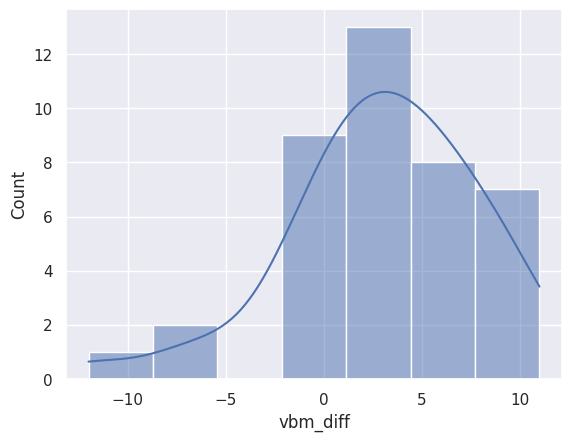

In [38]:
# Teste-t para amostras dependentes, métrica de Memória visual, verificando se há diferença entre o controle e as pessoas com concussão na situação de reteste.
impact['vbm_diff'] = impact['visual_memory_baseline'] - impact['visual_memory_retest']
sns.set_theme(style='darkgrid')
sns.histplot(data=impact, x='vbm_diff', kde=True)
plt.show()

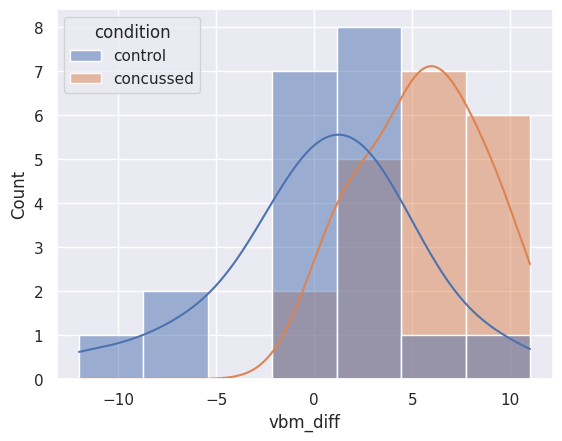

In [40]:
impact['vbm_diff'] = impact['visual_memory_baseline'] - impact['visual_memory_retest']
sns.set_theme(style='darkgrid')
sns.histplot(data=impact, x='vbm_diff', hue='condition',kde=True)
plt.show()

Faça o Teste-t para a métrica 'visual_memory_retest' - apresente a análise e responda:
- Qual a difença média?
- Qual o valor t e o que isso significa?
- Qual a significância do resultado (p-value) e o que isso significa?
- Qual o intervalo de confiança da diferença média? 


In [23]:
# Cálculo da média das diferenças
xbar_diff = impact['vbm_diff'].mean()
print(xbar_diff)

2.975


In [24]:
# valor de n (tamanho da amostra)
n_diff = len(impact)
print('n_diff: ', n_diff)


# desvio padrão da diferença (antes e depois)
s_diff = impact['vbm_diff'].std()
print('s_diff: ', s_diff)

# t student
t_stat = (xbar_diff-0 / np.sqrt(s_diff**2/n_diff))

# graus de liberdade
degrees_of_freedom = n_diff - 1
print('degrees_of_freedom: ', degrees_of_freedom)

# valor de p
p_value = t.cdf(t_stat, df=n_diff-1)
print('p_value: ', p_value)

n_diff:  40
s_diff:  4.82773769814095
degrees_of_freedom:  39
p_value:  0.9974959655708271


In [64]:
# Testar diferenças entre as médias usando teste t
pingouin.ttest(x=impact['vbm_diff'], y=0, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.897385,39,greater,0.000186,"[1.69, inf]",0.616231,148.131,0.985507


In [65]:
# Testar diferenças com amostras dependentes (paired=True)
pingouin.ttest(x=impact['verbal_memory_baseline'], y=impact['verbal_memory_retest'], paired=True, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.184333,39,greater,0.000079,"[4.63, inf]",0.858432,322.412,0.999887


In [77]:
# Testar diferenças com amostras independentes
pingouin.ttest(x=impact['verbal_memory_baseline'], y=impact['verbal_memory_retest'], paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.839024,78,greater,0.000125,"[4.39, inf]",0.858432,199.918,0.984636


In [12]:
# Verificar numero de entradas nas condições control e concussed,
impact['condition'].value_counts()

control      20
concussed    20
Name: condition, dtype: int64

In [37]:
# Visualizar estatísticas de sumário por grupo
impact.groupby('condition')['visual_memory_retest'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
concussed,20.0,69.2,8.376659,54.0,62.75,69.5,76.0,80.0
control,20.0,74.6,7.755473,60.0,69.50,74.5,80.0,86.0


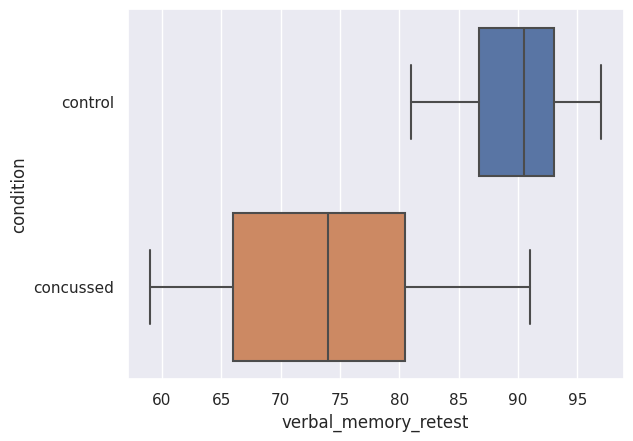

In [17]:
# Visualizar distribuições nas duas condições
sns.boxplot(x='verbal_memory_retest', y='condition', data=impact)
plt.show()

Teste de homoscedasticidade (homogeneidade da variância) (Levene). Qual o F ratio (W) e o p-value? Qual o significado?

In [36]:
pingouin.homoscedasticity(data=impact, dv='visual_memory_retest', group='condition', method='levene', alpha=0.05)

,W,pval,equal_var
levene,0.052246,0.820426,True


Não há violação da homogeneidade (teste não significativo).

## Testes T independentes

Utilizaremos os dados 'Atividade 07 - IQ - Threat + working memory'. Utilize a aba "sheet 2" que possui duas condições de ameaça de estereótipo.
Faremos testes-t independentes para a métrica de QI, verificando se há diferença entre o controle e as duas condições de ameaça de estereótipo.

In [43]:
iqthreats = pd.read_excel('../data/iq_threats.xlsx')

In [55]:
iqthreats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject      150 non-null    int64  
 1   condition    150 non-null    object 
 2   IQ           150 non-null    int64  
 3   WM           150 non-null    int64  
 4   WM.centered  150 non-null    float64
 5   D1           150 non-null    int64  
 6   D2           150 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 8.3+ KB


In [53]:
iqthreats.sample(10)

,subject,condition,IQ,WM,WM.centered,D1,D2
92,93,threat1,68,108,8.92,1,0
24,25,control,46,90,-9.08,0,0
86,87,threat1,55,111,11.92,1,0
6,7,control,100,99,-0.08,0,0
19,20,control,106,71,-28.08,0,0
72,73,threat1,37,92,-7.08,1,0
141,142,threat2,30,103,3.92,0,1
149,150,threat2,61,85,-14.08,0,1
101,102,threat2,59,86,-13.08,0,1
68,69,threat1,41,95,-4.08,1,0


2.1 Verifique a aderência dos dados à distribuição normal - apresente o histograma (com a linha de distribuição normal), o valor p < W e a análise para cada um dos três grupos. Dica - peça o histograma de toda a coluna e utilize o 'local data filter'

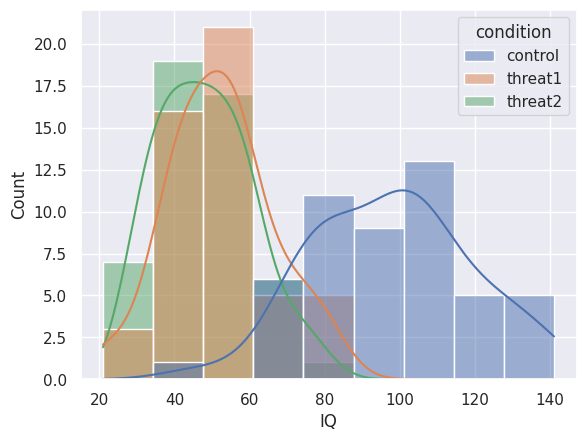

In [67]:
sns.histplot(data=iqthreats, x='IQ', hue='condition', kde=True)
plt.show()

Faça o Teste-t para a métrica 'QI' - apresente a análise e responda:
- Quais grupos possuem diferença significativa? 
- Qual o valor-t e valor-p do para controle e ameaça 1? Qual o intervalo de Confiança?
- Qual o valor-t e valor-p do para controle e ameaça 2? Qual o intervalo de Confiança?
- Qual o valor-t e valor-p do para ameaça 1e ameaça 2? Qual o intervalo de Confiança?

In [72]:
controle = iqthreats[iqthreats['condition'] == 'control']
ameaca1 = iqthreats[iqthreats['condition'] == 'threat1']
ameaca2 = iqthreats[iqthreats['condition'] == 'threat2']

In [75]:
# Testar diferenças para controle e ameaça 1
pingouin.ttest(x=controle['IQ'], y=ameaca1['IQ'], paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.894779,98,greater,3.904659e-23,"[39.83, inf]",2.578956,6.848e+19,1.0


In [74]:
# Testar diferenças para controle e ameaça 2
pingouin.ttest(x=controle['IQ'], y=ameaca2['IQ'], paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,14.475241,98,greater,2.233117e-26,"[44.14, inf]",2.895048,9.982e+22,1.0


In [81]:
# Testar diferenças para ameaça 1 e ameaça 2
pingouin.ttest(x=ameaca1['IQ'], y=ameaca2['IQ'], paired=False, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.575479,98,greater,0.059184,"[-0.22, inf]",0.315096,1.263,0.468015


Faça um teste da homogeneidade da variância (Levene)
- Qual o F ratio e o p-value? Qual o significado?

In [82]:
pingouin.homoscedasticity(data=iqthreats, dv='IQ', group='condition', method='levene', alpha=0.05)

,W,pval,equal_var
levene,7.320103,0.000932,False


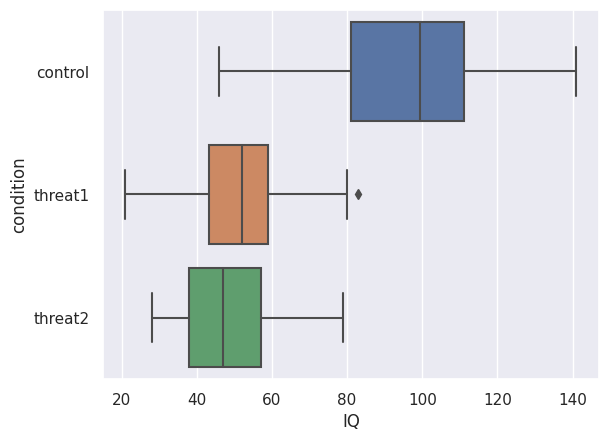

In [59]:
# Visualizar distribuições nas três condições
sns.boxplot(x='IQ', y='condition', data=iqthreats)
plt.show()

## ANOVA
Utilizaremos os mesmos dados da 'Atividade 07 - IQ - Threat + working memory'. Utilize a aba "sheet 2" que possui duas condições de ameaça de estereótipo.
Repetiremos a análise da parte 2, mas utilizando a ANOVA. Testaremos a métrica de QI, verificando se há efeito da ameaça de estereótipo e se há diferença os níveis de tratamento.

Faça uma ANOVA com a ameaça como preditor do IQ. (Fit Y by X). 
- Apresente o resultado e análise e responda: há efeito da ameaça? É significativo?
- Quando da variância de IQ pode ser explicada pela ameaça neste modelo?

In [83]:
alpha = 0.2
pingouin.anova(data=iqthreats, dv='IQ', between='condition')

/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,ddof1,ddof2,F,p-unc,np2
0,condition,2,147,146.563514,9.881849e-36,0.666006


In [84]:
# Teste em pares
pingouin.pairwise_tests(data=iqthreats, dv='IQ', between='condition', padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,condition,control,threat1,False,True,12.894779,98.0,two-sided,7.809318e-23,3.424e+19,2.559168
1,condition,control,threat2,False,True,14.475241,98.0,two-sided,4.466234e-26,4.991e+22,2.872836
2,condition,threat1,threat2,False,True,1.575479,98.0,two-sided,1.183687e-01,0.632,0.312678


In [85]:
# Ajuste Bonferroni
pingouin.pairwise_tests(data=iqthreats, dv='IQ', between='condition', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,condition,control,threat1,False,True,12.894779,98.0,two-sided,7.809318e-23,2.342795e-22,bonf,3.424e+19,2.559168
1,condition,control,threat2,False,True,14.475241,98.0,two-sided,4.466234e-26,1.339870e-25,bonf,4.991e+22,2.872836
2,condition,threat1,threat2,False,True,1.575479,98.0,two-sided,1.183687e-01,3.551060e-01,bonf,0.632,0.312678


Faça o teste post-hoc Tukey para todos os pares.
- Há efeito de todos os níveis? Explique.

In [86]:
pingouin.pairwise_tukey(data=iqthreats, dv='IQ', between='condition')

/home/marianne/code/Analise_Estatistica/venv/lib/python3.10/site-packages/pingouin/parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control,threat1,97.88,52.16,45.72,3.232193,14.145196,2.153833e-14,2.807333
1,control,threat2,97.88,48.02,49.86,3.232193,15.426061,2.153833e-14,3.061540
2,threat1,threat2,52.16,48.02,4.14,3.232193,1.280864,4.082157e-01,0.254207
